<a href="https://colab.research.google.com/github/manufabregas/booking_cancellation/blob/main/Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


* **hotel**: Tipo de hotel (puede ser "Resort Hotel" o "City Hotel").
* **is_canceled**: Indica si la reserva fue cancelada (1 = sí, 0 = no).
* **lead_time**: Días entre la fecha de reserva y la fecha de llegada.
* **arrival_date_year**: Año de llegada.
* **arrival_date_month**: Mes de llegada.
* **arrival_date_week_number**: Número de la semana en el año de llegada.
* **arrival_date_day_of_month**: Día del mes en que se espera la llegada.
* **stays_in_weekend_nights**: Número de noches de fin de semana reservadas (viernes y sábado).
* **stays_in_week_nights**: Número de noches entre semana reservadas (lunes a jueves).
* **adults**: Número de adultos incluidos en la reserva.
* **children**: Número de niños incluidos en la reserva.
* **babies**: Número de bebés incluidos en la reserva.
* **meal**: Tipo de comida reservada (e.g., BB = desayuno incluido, HB = media pensión, FB = pensión completa).
* **country**: País del huésped.
* **market_segment**: Segmento de mercado al que pertenece la reserva (e.g., online, corporativo, grupos).
* **distribution_channel**: Canal de distribución utilizado para la reserva (e.g., agencia de viajes, directo).
* **is_repeated_guest**: Indica si el huésped ha reservado anteriormente en el hotel (1 = sí, 0 = no).
* **previous_cancellations**: Número de cancelaciones anteriores del huésped.
* **previous_bookings_not_canceled**: Número de reservas anteriores que no fueron canceladas.
* **reserved_room_type**: Tipo de habitación reservada.
* **assigned_room_type**: Tipo de habitación asignada al huésped.
* **booking_changes**: Número de cambios en la reserva realizados por el huésped.
* **deposit_type**: Tipo de depósito (e.g., No Deposit, Non Refundable, Refundable).
* **agent**: ID del agente que gestionó la reserva.
* **company**: ID de la empresa que gestionó la reserva (si aplica).
* **days_in_waiting_list**: Días que la reserva estuvo en lista de espera.
* **customer_type**: Tipo de cliente (e.g., Contract, Transient, Group, Transient-Party).
* **adr**: Tarifa diaria promedio (Average Daily Rate) por habitación.
* **required_car_parking_spaces**: Número de espacios de aparcamiento requeridos por el huésped.
* **total_of_special_requests**: Número total de solicitudes especiales hechas por el huésped.
* **reservation_status**: Estado de la reserva (e.g., Check-Out, Canceled, No-Show).
* **reservation_status_date**: Fecha en que se actualizó el estado de la reserva.

In [2]:
df=pd.read_csv("./hotel_bookings.csv")
print(df.columns)
df.head()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


# **ANÁLISIS EXPLORATORIO**

---



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<Axes: >

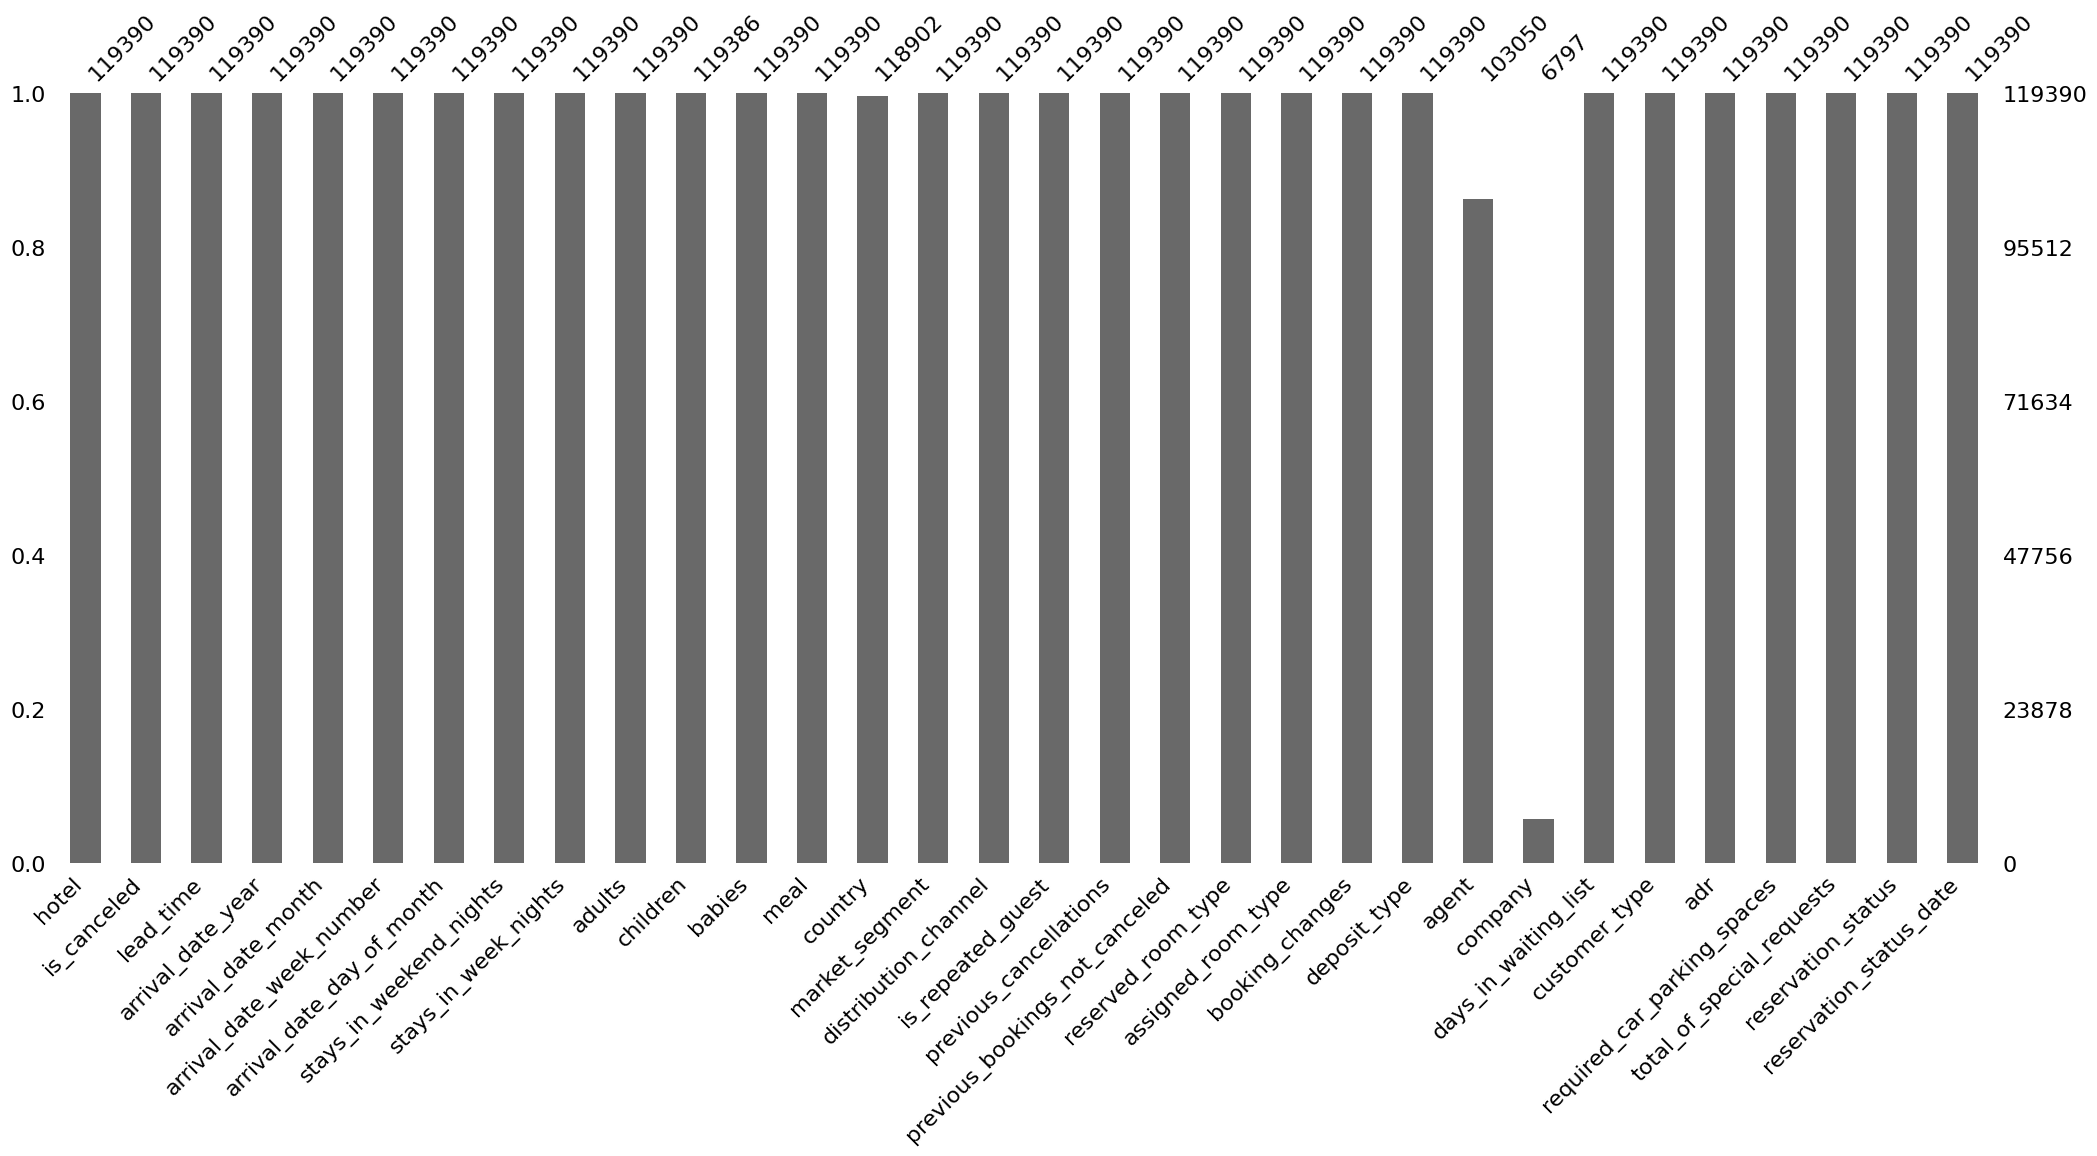

In [4]:
import missingno as msno
msno.bar(df)

In [5]:
# msno.dendrogram(df)

**Verificamos que no haya valores duplicados**

In [6]:
#Chequeamos que no haya filas duplicadas
df_check=df.duplicated().sum()
print(df.shape)
df_check

(119390, 32)


31994

In [7]:
#Eliminamos las filas duplicadas
df=df.drop_duplicates()
print(df.shape)
df.head(3)

(87396, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [8]:
# Separamos columnas numéricas
df_numerico = df.select_dtypes(include=['int64', 'float64'])
# print(df_numerico)
print(len(df_numerico.columns))

# Separamos columnas categóricas
df_categorico = df.select_dtypes(include=['object', 'category'])
# print(df_categorico)
print(len(df_categorico.columns))

20
12


# **ANÁLISIS DE VARIABLES CATEGÓRICAS**

In [9]:
df_cat_rel=df_categorico.copy()[['hotel','arrival_date_month','market_segment','reservation_status','deposit_type']] #,'country'

for i in df_cat_rel.columns:
    print(df_cat_rel[i].unique())

df_cat_rel.head(3)

['Resort Hotel' 'City Hotel']
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
['Check-Out' 'Canceled' 'No-Show']
['No Deposit' 'Refundable' 'Non Refund']


,hotel,arrival_date_month,market_segment,reservation_status,deposit_type
0,Resort Hotel,July,Direct,Check-Out,No Deposit
1,Resort Hotel,July,Direct,Check-Out,No Deposit
2,Resort Hotel,July,Direct,Check-Out,No Deposit


In [10]:
# # Elimino la col pais por el momento, ya que no tengo forma de saber el país de origen para rellenar
# df_check=df.copy()
# df_check=df_check[df_check['country'].isna()]
# df_check

In [ ]:
df_count_cat=df_categorico.copy()
df_count_cat=pd.concat([df_count_cat,df_numerico['is_canceled']],axis=1)
df_count_cat=df_count_cat.drop('country',axis=1)

# Crear una lista de las columnas categóricas
categorical_columns = df_count_cat.select_dtypes(include='object').columns

# Crear subplots para visualizar cada variable categórica
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    ax = axes[i] if len(categorical_columns) > 1 else axes
    sns.countplot(data=df_count_cat, x=col, hue='is_canceled', ax=ax)
    ax.set_title(f'Distribución de {col} en función de is_canceled')
    ax.set_xlabel(col)
    ax.set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

In [ ]:
#Realizo las transformaciones a las variables categóricas
df_cat_rel=df_cat_rel[~df_cat_rel['deposit_type'].isna()] #elimino un solo registro que tiene datos vacíos

le=LabelEncoder()

df_cat_rel["hotel"]=le.fit_transform(df_cat_rel["hotel"])
df_cat_rel["arrival_date_month"]=le.fit_transform(df_cat_rel["arrival_date_month"])

# df_cat_rel["hotel"].replace({"Resort Hotel": 1, "City Hotel": 2}, inplace=True)
# df_cat_rel["arrival_date_month"].replace({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}, inplace=True)

df_cat_rel = pd.get_dummies(df_cat_rel.copy(), columns=[ 'market_segment','reservation_status','deposit_type'], prefix=['ms', 'rs','dt']).astype(int)
df_cat_rel.head(3)

# **ANÁLISIS DE VARIABLES NUMÉRICAS**

In [ ]:
cols_graf=df_numerico#.columns[1:]

plt.figure(figsize=(20, 17), dpi=100)

for i, columna in enumerate(cols_graf, start=1):
    plt.subplot(4, 5, i)
    sns.histplot(data=df_numerico, x=columna,hue=df_numerico['is_canceled'])
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')


In [ ]:
cols_graf_new = df_numerico.columns[1:]

import plotly.express as px
from plotly.subplots import make_subplots

fig = make_subplots(rows=len(cols_graf_new), cols=1, subplot_titles=[f'{col} vs cancelación' for col in cols_graf_new] )

for i, column in enumerate(cols_graf_new):
    df_grouped = df_numerico.groupby([column, 'is_canceled']).size().reset_index(name='counts')
    scatter = px.scatter(df_grouped, x=column, y='is_canceled', size='counts', title=f'{column} vs cancelación')
    for trace in scatter.data:
        fig.add_trace(trace, row=i+1, col=1)

# # Actualizar el layout de la figura
fig.update_layout(height=4000, width=2000, showlegend=False)
fig.update_yaxes(tickvals=[0, 1], title='cancelación')

fig.show()

In [ ]:
#Seleccionaremos las variables numéricas que consideramos relevantes para el análisis
df_num_rel=df_numerico.copy()[['is_canceled','lead_time','stays_in_weekend_nights',	'stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr']]
df_num_rel['babies']=df_num_rel['babies'].fillna(0)
df_num_rel['children']=df_num_rel['children'].fillna(0)
df_num_rel.head(3)

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define cols_graf_vio as a flat list (not a list of lists)
cols_graf_vio = [ 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                  'adults', 'children', 'babies', 'previous_cancellations',
                  'previous_bookings_not_canceled', 'booking_changes', 'adr']

fig = make_subplots(rows=2, cols=5, subplot_titles=[f'{col}' for col in cols_graf_vio])

for i, column in enumerate(cols_graf_vio):
    box = go.Box(x=df_num_rel[column], name=column)
    row = (i // 5) + 1
    col = (i % 5) + 1
    fig.add_trace(box, row=row, col=col)


fig.update_layout(height=600, width=3000, title_text="Box Plots")
fig.show()



In [ ]:
df_check=df.copy()
df_check=df[df['babies']==9]
df_check

In [ ]:
for col in cols_graf_vio:
    print('Feature Name: {}'.format(col))
    for i in range(95, 101, 1):
        quantile_value = np.quantile(df_num_rel[col], q=i/100)
        print('{}th quantile value is: {}'.format(i, quantile_value))
    print('\n')


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


df_count_cat=df_categorico.copy()
df_count_cat=pd.concat([df_count_cat,df_numerico['is_canceled']],axis=1)
df_total_reservas = df_count_cat.groupby('country')['is_canceled'].count().reset_index(name='total_reservas')
df_total_reservas = df_total_reservas.sort_values(by='total_reservas')

# Agrupar por país y estado de cancelación, contar las ocurrencias
df_cancelaciones_bars = df_count_cat.groupby(['country', 'is_canceled']).size().reset_index(name='count')

fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Scatter(x=df_total_reservas['country'], y=df_total_reservas['total_reservas'],
               name="Total de Reservas", mode='lines+markers'),
    secondary_y=False  # Esto indica que el gráfico de líneas usa el eje y primario
)


for is_canceled_value in [0, 1]:
    df_filtered = df_cancelaciones_bars[df_cancelaciones_bars['is_canceled'] == is_canceled_value]
    fig.add_trace(
        go.Bar(x=df_filtered['country'], y=df_filtered['count'],
               name=f"Cancelado: {is_canceled_value}", text=df_filtered['count']),
        secondary_y=True  # Esto indica que el gráfico de barras usa el eje y secundario
    )

# Actualizar el layout del gráfico
fig.update_layout(
    title_text="Total de Reservas y Cancelaciones por País",
    xaxis_title="País",
    yaxis_title="Total de Reservas",
    yaxis2_title="Cantidad de Cancelaciones",
    barmode='stack',  # Apilar las barras
    xaxis={'categoryorder':'total ascending'},  # Ordenar países por total de reservas
    legend_title="Estado de Cancelación"
)

# Mostrar gráfico
fig.show()


In [ ]:
# df_num_rel
# df_cat_rel

In [ ]:
df=pd.concat([df_cat_rel,df_num_rel],axis=1)
df.head(3)
# df_num_rel concat df_cat_rel
#Eliminar las en 'adults','children','babies', en 0

In [ ]:
df_base_corr=df_numerico.copy()

plt.figure(figsize=(20,10), dpi =500)
corr = df_base_corr.corr(method = 'pearson')
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()

# **LIMPIEZA DE DATOS**

---

